## Подготовительная работа

In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('data/coil_stat.xlsx')
rows = sorted([f'V{n}{d:02d}' for d in range(2, 12) for n in range(1, 12)])
# rows += 
rects = df.loc[(df['file'].isin(rows))]

%matplotlib inline

In [2]:
def plot_step_stat(dframe, step, wire, ax=None, color=''):
    res = dframe.loc[(dframe['step (mm)'] == step) & (dframe['wire_dia (mm)'] == wire)][['file', 'wire_len (cm)', 'coil_n', 'L, uH']]
    res = res.sort_values(['coil_n'], ascending=[1])
    ax = res.plot(x='coil_n', y='L, uH', title=f'проводник={wire} мм', ax=ax, color=color, label=f'{step} мм')
    ax1 = ax.twiny()
    res.plot(x='wire_len (cm)', y='L, uH', ax=ax1, color=color)
    ax.grid(linestyle='--')
    ax.set_xlim(0, 12)
    ax.set_ylim(0, 25)
    ax1.set_xlim(0, 295)
    ax1.set_ylim(0, 25)
    ax1.set_xlabel('Длина проводника, см')
    ax1.lines = list()
    ax1.get_legend().remove()
    ax.set_ylabel('Индуктивность, мкГн')
    ax.set_xlabel('Кол-во витков')
    return ax, res

def plot_coil_n_stat(dframe, coil_n, wire, ax=None, color=''):
    res = dframe.loc[(dframe['coil_n'] == coil_n) & (dframe['wire_dia (mm)'] == wire)][['file', 'step (mm)', 'L, uH']]
    res = res.sort_values(['step (mm)'], ascending=[1])
    ax = res.plot(x='step (mm)', y='L, uH', title=f'проводник={wire} мм', ax=ax, color=color, label=f'{coil_n} шт')
    ax.grid(linestyle='--')
    ax.set_xlim(0, 1.1)
    ax.set_ylim(0, 25)
    ax.set_ylabel('Индуктивность, мкГн')
    ax.set_xlabel('Шаг, мм')
    return ax, res

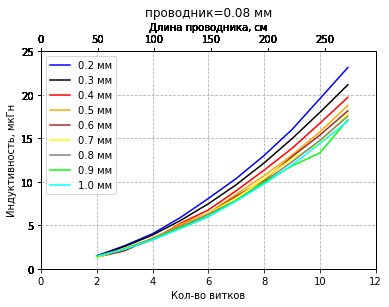

In [3]:
ax_coil_n_008, _ = plot_step_stat(rects, step=0.2, wire=0.08, color='blue')
for st, col in zip([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], ['black', 'red', 'orange', 'brown', 'yellow', 'grey', 'lime', 'cyan']):
    plot_step_stat(rects, step=st, wire=0.08, color=col, ax=ax_coil_n_008)

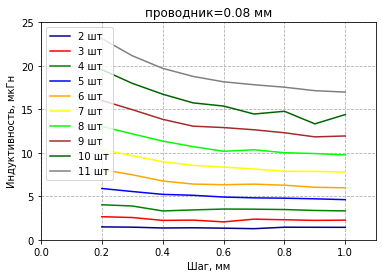

In [4]:
ax_step_008, res = plot_coil_n_stat(rects, coil_n=2, wire=0.08, color='darkblue')
for st, col in zip(range(3, 12), ['red', 'green', 'blue', 'orange', 'yellow', 'lime', 'brown', 'darkgreen', 'grey']):
    plot_coil_n_stat(rects, coil_n=st, wire=0.08, ax=ax_step_008, color=col)

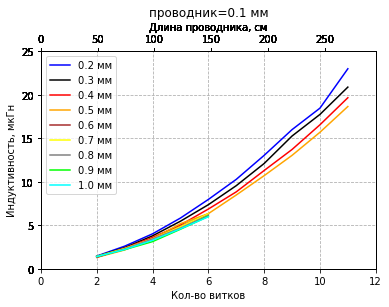

In [5]:
ax_coil_n_01, _ = plot_step_stat(rects, step=0.2, wire=0.1, color='blue')
for st, col in zip([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], ['black', 'red', 'orange', 'brown', 'yellow', 'grey', 'lime', 'cyan']):
    plot_step_stat(rects, step=st, wire=0.1, color=col, ax=ax_coil_n_01)

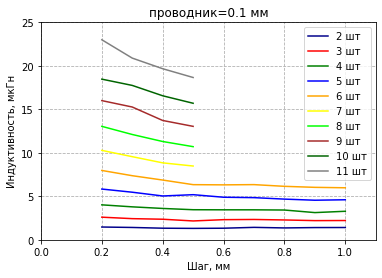

In [6]:
ax_step_01, res = plot_coil_n_stat(rects, coil_n=2, wire=0.1, color='darkblue')
for st, col in zip(range(3, 12), ['red', 'green', 'blue', 'orange', 'yellow', 'lime', 'brown', 'darkgreen', 'grey']):
    plot_coil_n_stat(rects, coil_n=st, wire=0.1, color=col, ax=ax_step_01)

## провод 0.08 мм, малые волны:

,file,wire_len (cm),wire_dia (mm),step (mm),coil_n,width (mm),height (mm),"L, uH",freq,q,mod,done
283,VEXPN5,117.829,0.08,0.3,4.0,79.0,45.0,4.047,NaN,NaN,small-wave-8-4-0,+
285,VEXPN5_1,83.523,0.08,0.5,3.0,79.0,45.0,2.516,NaN,NaN,small-wave-9-1-2,+
287,VEXPN5_2,109.515,0.08,0.5,4.0,79.0,45.0,3.661,NaN,NaN,small-wave-9-2-2,+
289,VEXPN5_3,85.165,0.08,0.5,3.0,79.0,45.0,2.477,NaN,NaN,small-wave-9-2-1,+
291,VEXPN5_4,111.288,0.08,0.5,4.0,79.0,45.0,3.628,NaN,NaN,small-wave-9-3-1,+
293,VEXPN5_5,86.969,0.08,0.5,3.0,79.0,45.0,2.482,NaN,NaN,small-wave-9-3-0,+


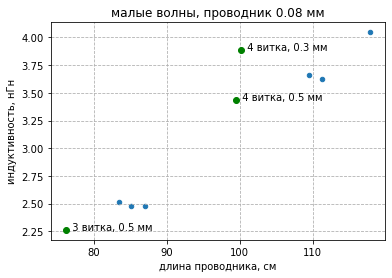

In [7]:
expn5_008 = df.loc[df['file'].str.match('VEXPN5')]
expn5_008 = expn5_008.loc[expn5_008['wire_dia (mm)'] == 0.08]
ts_008 = [v for v in expn5_008['mod']]
ls_008 = list(expn5_008['L, uH'])

ax = expn5_008.plot.scatter(x='wire_len (cm)', y='L, uH', title='малые волны, проводник 0.08 мм')
ax.grid(linestyle='--')
# ax.set_xlim(100, 112)
# ax.set_ylim(3.9, 4.2)
ax.set_ylabel('индуктивность, нГн')
ax.set_xlabel('длина проводника, см')

rect_4_03_008 = df.loc[(df['file'] == 'V303') & (df['wire_dia (mm)'] == 0.08)]
rect_4_05_008 = df.loc[(df['file'] == 'V305') & (df['wire_dia (mm)'] == 0.08)]
rect_3_05_008 = df.loc[(df['file'] == 'V205') & (df['wire_dia (mm)'] == 0.08)]

r_len = [rect_4_03_008['wire_len (cm)'], rect_4_05_008['wire_len (cm)'], rect_3_05_008['wire_len (cm)']]
r_L = [rect_4_03_008['L, uH'], rect_4_05_008['L, uH'], rect_3_05_008['L, uH']]
for rl, rL, txt in zip(r_len, r_L, ['4 витка, 0.3 мм', '4 витка, 0.5 мм', '3 витка, 0.5 мм']):
    ax.plot(rl, rL, 'go')
    ax.text(rl, rL, f'  {txt}')

expn5_008

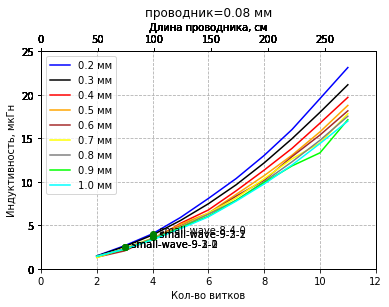

In [8]:
for t, l, n in zip(ts_008, ls_008, [4, 3, 4, 3, 4, 3]):
    ax_coil_n_008.plot(n, l, 'go')
    ax_coil_n_008.text(n, l, f'  {t}')

# ax.set_xlim(3.75, 4.25)
# ax.set_ylim(4, 4.15)
ax_coil_n_008.figure

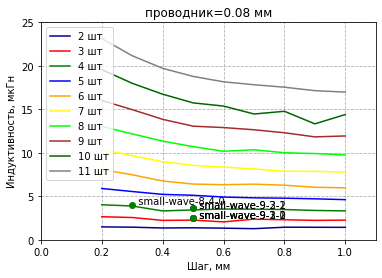

In [9]:
for t, l, s in zip(ts_008, ls_008, [0.3, 0.5, 0.5, 0.5, 0.5, 0.5]):
    ax_step_008.plot(s, l, 'go')
    ax_step_008.text(s, l, f'  {t}')

ax_step_008.figure

## провод 0.1 мм, малые волны:

,file,wire_len (cm),wire_dia (mm),step (mm),coil_n,width (mm),height (mm),"L, uH",freq,q,mod,done
284,VEXPN5,117.829,0.1,0.3,4.0,79.0,45.0,4.015,19640.0,66.0,small-wave-8-4-0,+
286,VEXPN5_1,83.523,0.1,0.5,3.0,79.0,45.0,2.507,24000.0,22.0,small-wave-9-1-2,+
288,VEXPN5_2,109.515,0.1,0.5,4.0,79.0,45.0,3.673,21100.0,69.0,small-wave-9-2-2,+
290,VEXPN5_3,85.165,0.1,0.5,3.0,79.0,45.0,2.487,24000.0,22.0,small-wave-9-2-1,+
292,VEXPN5_4,111.288,0.1,0.5,4.0,79.0,45.0,3.608,21090.0,70.0,small-wave-9-3-1,+
294,VEXPN5_5,86.969,0.1,0.5,3.0,79.0,45.0,2.557,24000.0,22.0,small-wave-9-3-0,+


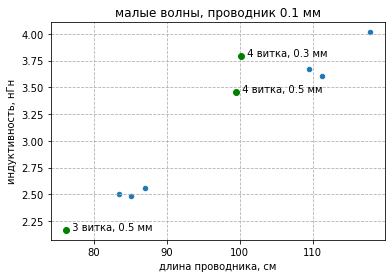

In [10]:
expn5_01 = df.loc[df['file'].str.match('VEXPN5')]
expn5_01 = expn5_01.loc[expn5_01['wire_dia (mm)'] == 0.1]
ts_01 = [v for v in list(expn5_01['mod'])[:3]]
ls_01 = list(expn5_01['L, uH'])[:3]

ax = expn5_01.plot.scatter(x='wire_len (cm)', y='L, uH', title='малые волны, проводник 0.1 мм')
ax.grid(linestyle='--')
# ax.set_xlim(100, 112)
# ax.set_ylim(3.9, 4.2)
ax.set_ylabel('индуктивность, нГн')
ax.set_xlabel('длина проводника, см')

rect_4_03_01 = df.loc[(df['file'] == 'V303') & (df['wire_dia (mm)'] == 0.1)]
rect_4_05_01 = df.loc[(df['file'] == 'V305') & (df['wire_dia (mm)'] == 0.1)]
rect_3_05_01 = df.loc[(df['file'] == 'V205') & (df['wire_dia (mm)'] == 0.1)]

r_len = [rect_4_03_01['wire_len (cm)'], rect_4_05_01['wire_len (cm)'], rect_3_05_01['wire_len (cm)']]
r_L = [rect_4_03_01['L, uH'], rect_4_05_01['L, uH'], rect_3_05_01['L, uH']]
for rl, rL, txt in zip(r_len, r_L, ['4 витка, 0.3 мм', '4 витка, 0.5 мм', '3 витка, 0.5 мм']):
    ax.plot(rl, rL, 'go')
    ax.text(rl, rL, f'  {txt}')

expn5_01

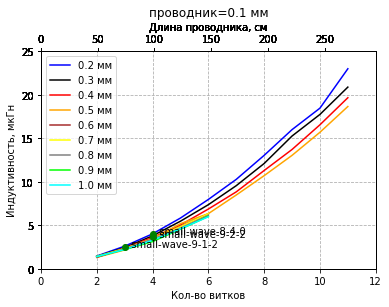

In [11]:
for t, l, n in zip(ts_01, ls_01, [4, 3, 4, 3, 4, 3]):
    ax_coil_n_01.plot(n, l, 'go')
    ax_coil_n_01.text(n, l, f'  {t}')

# ax.set_xlim(3.75, 4.25)
# ax.set_ylim(4, 4.15)
ax_coil_n_01.figure

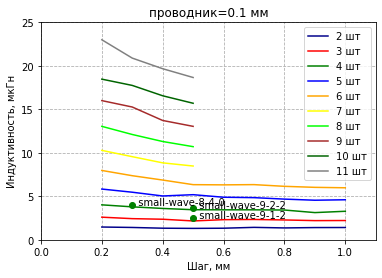

In [12]:
for t, l, s in zip(ts_01, ls_01, [0.3, 0.5, 0.5, 0.5, 0.5, 0.5]):
    ax_step_01.plot(s, l, 'go')
    ax_step_01.text(s, l, f'  {t}')

ax_step_01.figure